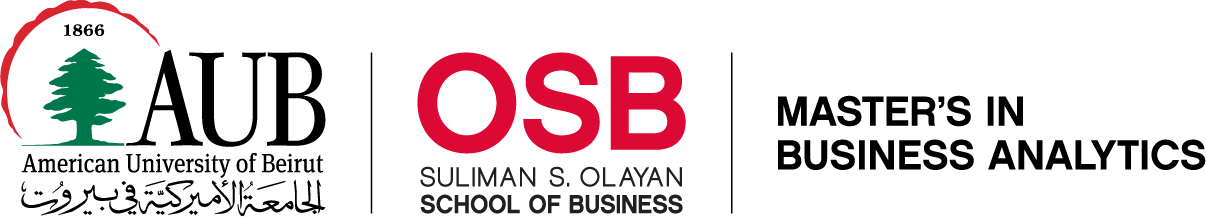

## Done by: Ali Maatouk 
### [Data Set Link](https://www.kaggle.com/jessemostipak/hotel-booking-demand) 



# Context 
**Data cleaning is performed on the Hotel Booking Demand
dataset to allow the exploratory analysis on a clean Dataset.
My goal is to be able to answer some the following questions:**
1. What is the number of canceled bookings?
2. How much is the booking ratio of Resort Hotel? And City
Hotel?
3. What is the percentage of booking for each year?
4. Which nationality visits both hotels the most? (From
which country?)
5. How long do guests usually stay at the hotel?
6. What is the most demanded type of room (single, couple,
or family)?


# DATA SET CONTENT 
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

#Part I Exploratory Data Analysis [70%]

## 1. <mark>**Perform an exploratory data analysis by doing at least the following:</mark>**
- Load the data into a pandas dataframe on Colab
- Clean the data by removing or replacing missing values, NaN, etc.
- Calculate summary statistics
-Produce useful visualizations


### Importing the required libraries

In [ ]:
#install pycountry first
%pip install pycountry

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import pycountry as pc
pd.options.display.max_columns = None

###Loading the csv data set into Pandas data frame from Google Drive 

In [ ]:
# Code to read csv file into Colaboratory
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/hotel_bookings.csv"
df = pd.read_csv(path, index_col = False)

df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children   

###Finding the Null Values in the Data Frame


In [ ]:
df.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

###WRONG DATA TYPE: Converting the object datatype of “reservation_status_date” to DateTime datatype using pd.to_datetime

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

###Creating an Arrival Date Column by combining the Month, and Day column to find the date of arrival

In [ ]:
df['arrival_date'] = pd.to_datetime(df.arrival_date_year.astype(str) + '/' + df.arrival_date_month.astype(str)
+ '/' + df.arrival_date_day_of_month.astype(str))

### REMOVING Unnecessary Columns arrival_date_year , arrival_date_month ,arrival_date_week_number , arrival_date_day_of_month

In [ ]:
df.drop(columns = ['arrival_date_month', 'arrival_date_week_number',
'arrival_date_day_of_month'], inplace = True, axis = 1)

### Replacing Null Agent rows with 0

In [ ]:
df['agent'] = df['agent'].fillna(0)

### Dropping Company Column because it has 94% null values

In [ ]:
df.drop('company', inplace = True, axis =1)

### Replace missing values in the country column by the Mode

In [ ]:
df['country'].fillna(df.country.mode().to_string(), inplace=True)

### Replacing missing values in children column with rounded mean

In [ ]:
df['children'].fillna(round(df.children.mean()), inplace=True)

In [ ]:
#no more missing values
df.isnull().sum().sort_values(ascending=False)[:10]

hotel                             0
previous_bookings_not_canceled    0
reservation_status_date           0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
agent                             0
dtype: int64

### Correcting the Data Type of Children, ADR, and Agents Columns by converting them to integers 

In [ ]:
df[['children', 'agent', 'adr']] = df[['children', 'agent', 'adr']].astype('int64')

### Removing rows with 0 guests (adults, children, babies)

In [ ]:
df[(df.adults+df.children+df.babies)==0].shape

(180, 29)

In [ ]:
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

*after removing the uncessary rows*

In [ ]:
df[(df.adults+df.children+df.babies)==0].shape

(0, 29)

### Removing Dudlicate Rows

In [ ]:
duplicates = df.duplicated()

In [ ]:
duplicates.head(20)

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [ ]:
df.drop_duplicates(subset=None, keep='first', inplace= True)

### Converting numerical columns into categorical columns

In [ ]:
df["is_repeated_guest"] = df["is_repeated_guest"].astype('category')
df.is_repeated_guest.describe()

count     87205
unique        2
top           0
freq      83841
Name: is_repeated_guest, dtype: int64

In [ ]:
df["is_canceled"] = df["is_canceled"].astype('category')
df.is_canceled.describe()

count     87205
unique        2
top           0
freq      63197
Name: is_canceled, dtype: int64

### Change 'adr ' column name to 'Average Daily Rate' 

In [ ]:
df.rename(columns = {'adr':'average_daily_rate'}, inplace = True)

### Removing negative values from the average daily rate

In [ ]:
#Checking the negative value
df[df['average_daily_rate'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
14969,Resort Hotel,0,195,2017,4,6,2,0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273,0,Transient-Party,-6,0,0,Check-Out,2017-03-15,2017-03-05


In [ ]:
#Removing the negative Value
df.drop(df[df['average_daily_rate'] < 0].index, inplace = True)

### Removing Outliers from Lead_Time & Days in waiting list

In [ ]:
#outlier removing function
def remove_outlier(col_name):
    global df
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df = df.drop(df[(df[col_name] < fence_low) | (df[col_name] > fence_high)].index)
    return df

In [ ]:
remove_outlier('lead_time')

,hotel,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
2,Resort Hotel,0,7,2015,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,Transient,75,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98,0,1,Check-Out,2015-07-03,2015-07-01
6,Resort Hotel,0,0,2015,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,0,Transient,107,0,0,Check-Out,2015-07-03,2015-07-01
7,Resort Hotel,0,9,2015,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303,0,Transient,103,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,0,Transient,96,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,0,102,2017,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,0,Transient,225,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,0,34,2017,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,Transient,157,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,0,109,2017,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,0,Transient,104,0,0,Check-Out,2017-09-07,2017-08-31


In [ ]:
remove_outlier('days_in_waiting_list')

,hotel,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
2,Resort Hotel,0,7,2015,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,Transient,75,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98,0,1,Check-Out,2015-07-03,2015-07-01
6,Resort Hotel,0,0,2015,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,0,Transient,107,0,0,Check-Out,2015-07-03,2015-07-01
7,Resort Hotel,0,9,2015,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303,0,Transient,103,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,0,Transient,96,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,0,102,2017,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,0,Transient,225,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,0,34,2017,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,Transient,157,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,0,109,2017,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,0,Transient,104,0,0,Check-Out,2017-09-07,2017-08-31


### Resetting the index of the Data Frame after removing unnecessary row

In [ ]:
df.reset_index(drop = True, inplace = True)

### Summary Statisticas & Calculations 

General Summary Statistics for all columns


In [ ]:
df.describe()

,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests
count,84071.000000,84071.000000,84071.000000,84071.000000,84071.000000,84071.000000,84071.000000,84071.000000,84071.000000,84071.000000,84071.000000,84071.0,84071.000000,84071.000000,84071.000000
mean,71.611079,2016.204863,0.998537,2.592999,1.876747,0.140381,0.010943,0.028999,0.188983,0.260339,80.608141,0.0,106.802893,0.086094,0.705511
std,72.922090,0.685858,1.018123,2.018160,0.505175,0.458628,0.114383,0.362729,1.758317,0.695420,109.714252,0.0,55.216975,0.283205,0.832170
min,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,11.000000,2016.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.0,72.000000,0.000000,0.000000
50%,46.000000,2016.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.0,99.000000,0.000000,1.000000
75%,116.000000,2017.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.0,135.000000,0.000000,1.000000
max,296.000000,2017.000000,19.000000,50.000000,4.000000,10.000000,10.000000,26.000000,72.000000,17.000000,535.000000,0.0,5400.000000,8.000000,5.000000


**Writing a function to calculate the percentages from different columns.**

This function takes a series or data frame column and returns the two arrays

x is our unique values
y is the percentage value of each unique value

In [ ]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

finding the percentages of cancled and uncancled reservations 


In [ ]:
x_1,y_1 = get_count(df['is_canceled'])
x_1,y_1
# 73% uncancled vs. 27% cancled

([0, 1]
 Categories (2, int64): [0, 1], array([73.05967575, 26.94032425]))

booking ratio between city and resort hotel


In [ ]:
#Selecting uncancled booking for further calculations
df_not_canceled = df[df['is_canceled'] == 0]
#booking ratio between city and resort hotel
x_2,y_2 = get_count(df_not_canceled['hotel'])
x_2,y_2
#60% of booking go to City Hotel, the remaining 40% go to Resort Hotel

(array(['City Hotel', 'Resort Hotel'], dtype=object),
 array([59.10748592, 40.89251408]))

Distribution of Bookings throughout the years


In [ ]:
x_3,y_3 = get_count(df_not_canceled['arrival_date_year'])
x_3,y_3
#2016 49%, 2015 16%, 2017 34%. 

(array([2016, 2017, 2015]), array([49.21363681, 33.90478981, 16.88157338]))

### Useful Visualizations 

**Writing a function to plot the diagrams of previous calculations to visualize them**

In [ ]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()

**Which nationality visits both hotels the most? (From which country?)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


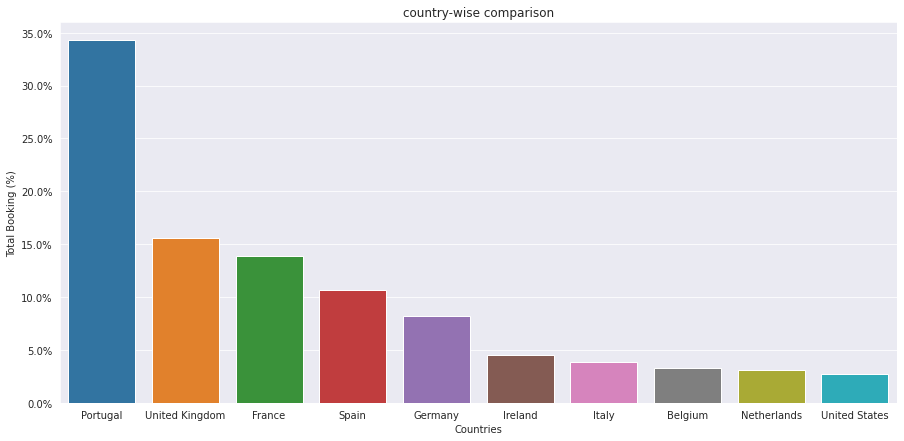

In [ ]:
x,y = get_count(df_not_canceled['country'], limit=10)

# For each country code select the country name 
country_name = [pc.countries.get(alpha_3=name).name for name in x]

plot(country_name,y, x_label='Countries', y_label='Total Booking (%)', title='country-wise comparison', figsize=(15,7))

**What is the number of canceled bookings?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


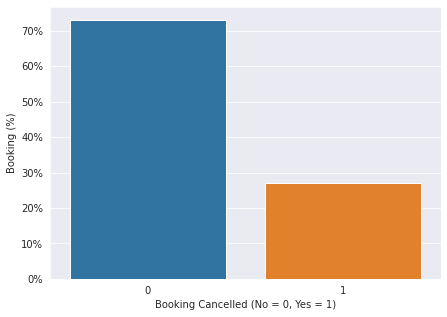

In [ ]:
plot(x_1,y_1, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

**How much is the booking ratio of Resort Hotel? And City Hotel?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


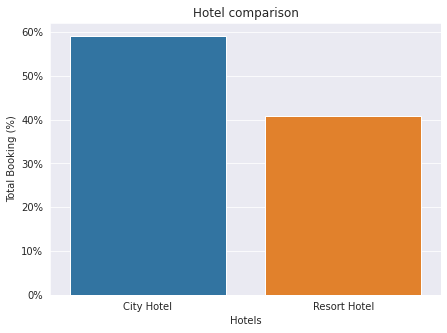

In [ ]:
plot(x_2,y_2, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')

**What is the percentage of booking for each year?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


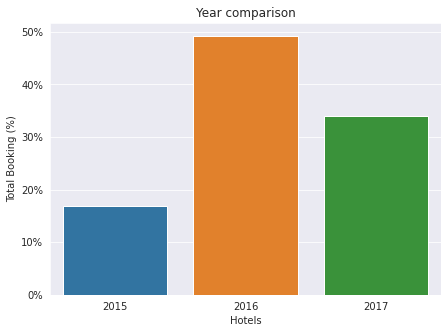

In [ ]:
plot(x_3,y_3, x_label='Hotels', y_label='Total Booking (%)', title='Year comparison')

**What is the most demanded type of room (single, couple, or family)?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


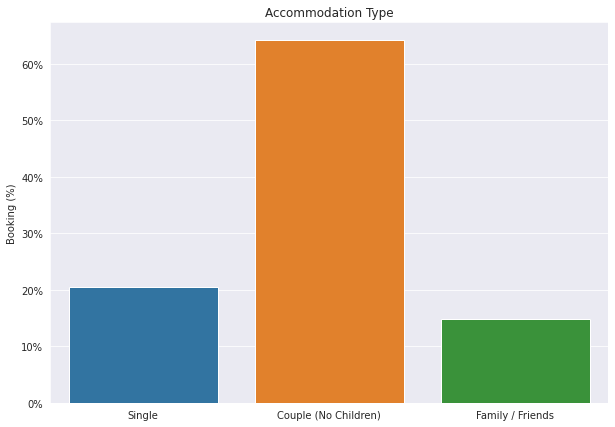

In [ ]:
# Divide the rooms into single, couple, or family according to the below conditions:
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]


# Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]

plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))

## 2. <mark>**Describe your interesting findings and insights about the data, and how it might add value to the business.**</mark>

The hotels managmenet is now able to make data driven decisions based on the insights gotten from both visualizations and calculations. 


1.   Finding out the top 10 nationalities that visit the hotels enables the marketing team to develop advertising strategies that are able to target and focus on those customers, which leads to a positive impact on reservations and eventually revenues. 

2.   Comparing the demand among the hotels, allows the managment to come up with decisions related to increasing the number of rooms for the hotel with the highest demand, allocating more funds to meet future demand, or even exploring further reasons behind the difference between the demand of both hotels. 

3. Keeping an eye on the cancelation rates and yearly booking percantages, allows the managment to measure the hotel performence, and report it for the shareholders (who are interested in such metrics). 



# Part II Manipulating Dataframes [30%]

##1. Create a function called append_randint_col(df):
- Input a dataframe (df)
-Add a column named "RandInt" to df and fill its row values with random integer
numbers from 1 and 100.
-Return: df with the additional RandInt column (as illustrated in the above df)
-Apply this function to your original (and cleaned) dataframe (df) from Part I:
-df1 = append_randint_col(df)

In [ ]:
#writing the function

def append_randint_col(df):
  df['RandInt'] = np.random.randint(1,100, size=len(df))
  return df 

#Apply the function

df1 = append_randint_col(df)

#Check the Resulting DataFrame

df1.RandInt

0        88
1         7
2        13
3        54
4        76
         ..
84066    56
84067    39
84068    58
84069    40
84070    50
Name: RandInt, Length: 84071, dtype: int64

##2. Create another function called split_even_odd(df):

*   Input: a dataframe with a RandInt column

*   Return: two dataframes (of about the same size), the first containing all rows where the RandInt value is even (e.g., row 1 and row n, in the above df) and the second containing all rows where the RandInt value is odd (e.g., row 2 and row 3 in the above df)
-Apply this function to df1: df2_even, df2_odd = split_even_odd(df1)

In [ ]:
#writing the function

def split_even_odd(df1):
  df1_even = df1[df1.RandInt % 2 == 0]
  df1_odd = df1[df1.RandInt % 2 != 0]
  return df1_even, df1_odd

#Apply the function

df2_even, df2_odd = split_even_odd(df1)

#Check the Resulting DataFrame

df2_even.RandInt

0        88
3        54
4        76
9        34
12       66
         ..
84065    82
84066    56
84068    58
84069    40
84070    50
Name: RandInt, Length: 41427, dtype: int64

##**3. Create another function called split_80_20_percent(df):**
- Input: a dataframe with a RandInt column
- Return: two dataframes split randomly, the first containing 80% of the rows and the second the remaining 20%
- Apply this function to df1: df3_80, df3_20 = split_80_20_percent(df1)
- Recalculate your summary statistics (as done in part I) on df3_80 and df3_20 (i.e., 80% of the data and 20% of the data), and compare the results.

In [ ]:
def split_80_20_percent(df1):
  # Creating a dataframe with 80% randomly selected values of original dataframe
  df1_80 = df.sample(frac = 0.8)
  # Creating a dataframe with the remaining 20% of original dataframe
  df1_20 = df.drop(df1_80.index)
  return df1_80, df1_20

#Apply this function to df1: 
df3_80, df3_20 = split_80_20_percent(df1)

In [ ]:
#Recalculating the results from the summary statistics on df3_80
df3_80.describe()

,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests,RandInt
count,67257.000000,67257.000000,67257.000000,67257.000000,67257.000000,67257.000000,67257.000000,67257.000000,67257.000000,67257.000000,67257.000000,67257.0,67257.000000,67257.000000,67257.000000,67257.000000
mean,71.604368,2016.201882,0.997814,2.587820,1.876637,0.141011,0.011463,0.029558,0.188337,0.262322,80.459566,0.0,106.789107,0.086370,0.706454,49.776172
std,72.847761,0.685680,1.015834,2.014384,0.504197,0.460279,0.118609,0.369676,1.742959,0.697227,109.608284,0.0,55.973648,0.282548,0.832065,28.489031
min,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
25%,11.000000,2016.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.0,72.000000,0.000000,0.000000,25.000000
50%,46.000000,2016.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.0,99.000000,0.000000,1.000000,50.000000
75%,116.000000,2017.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.0,135.000000,0.000000,1.000000,74.000000
max,296.000000,2017.000000,19.000000,50.000000,4.000000,10.000000,10.000000,26.000000,72.000000,17.000000,535.000000,0.0,5400.000000,3.000000,5.000000,99.000000


In [ ]:
#Recalculating the results from the summary statistics on df3_20
df3_20.describe()

,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests,RandInt
count,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.0,16814.000000,16814.000000,16814.000000,16814.000000
mean,71.637921,2016.216784,1.001427,2.613715,1.877186,0.137861,0.008862,0.026763,0.191567,0.252409,81.202450,0.0,106.858035,0.084989,0.701737,50.239800
std,73.220821,0.686463,1.027255,2.033124,0.509085,0.451965,0.095606,0.333498,1.818506,0.688106,110.138375,0.0,52.081976,0.285825,0.832602,28.574146
min,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
25%,10.000000,2016.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.0,72.000000,0.000000,0.000000,25.000000
50%,45.000000,2016.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.0,99.000000,0.000000,1.000000,51.000000
75%,116.000000,2017.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.0,135.000000,0.000000,1.000000,75.000000
max,296.000000,2017.000000,16.000000,40.000000,4.000000,3.000000,2.000000,24.000000,66.000000,16.000000,535.000000,0.0,426.000000,8.000000,5.000000,99.000000


Comparing the summary statistics among df, df1_80, and df1_20



1. The main difference between the 3 dataframes is that number of rows, df: 84071 rows, df1_80: 67257 rows, df1_20: 16814 rows.

2. In general, the percentiles in df1_80 are closer to the percentiles in the original df, since the difference in the number of rows is negligible, while the difference percentiles in df1_20 with respect to df is huge. 

3. The maximum stays_in_weekend_nights in df1_80 = 19 while df1_20 =13. 

4. The maximum stays_in_week_nights in df1_80 = 50 while df1_20 = 33. 

5. The maximum children in df1_80 = 3 while df1_20 = 10. 

6. The maximum babies in df1_80 = 2 while df1_20 = 10.



In [ ]:
%%shell
jupyter nbconvert --to html ////content/ahm44_Ali_Maatouk_assign1.ipynb

[NbConvertApp] Converting notebook ////content/ahm44_Ali_Maatouk_assign1.ipynb to html
[NbConvertApp] Writing 519257 bytes to ////content/ahm44_Ali_Maatouk_assign1.html
